In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) # 이 두줄은 티스토리 글쓴이가 쓰는 방법
#matplotlib 의 기본 scheme import matplotlib.pyplot as plt plt.rc('font', size=20)  # 기본 폰트 크기  이렇게 사용 하는 방법 대신
# 일일이 graph 의 font size 를 지정할 필요 없이 
#seaborn 의 font_scale 을 사용하는 방법.

import missingno as msno #결측치 시각화 패키지 

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#notebook을 실행한 브라우저에서 바로 그림과 애니매이션과 같은 결과물(Rich output)을 볼 수 있게 해주는 것
%matplotlib inline 

<ipython-input-1-1e946e42c405>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


1st dataset확인

2nd EDA

3re 모델의 feature engineering

4th model 만들기

5th 학습, predict

6th 평가

In [2]:
df_train = pd.read_csv('/content/drive/MyDrive/titanic/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/titanic/test.csv')

In [3]:
df_train.head() # 1st. dataset 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


다루고자 하는 feature : Pclass, Age, SibSp, Parch, Fare 

예측하고자 하는 feature : Survived (생존 여부)

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
#결측치 확인하기
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


train set : Age, Cabin, Embarked 에 결측치 있음.

In [7]:
# 겿측치 확인하기 2
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


train set :  Age, Cabin, Fare에 결측치 가지고있음.

<Axes: >

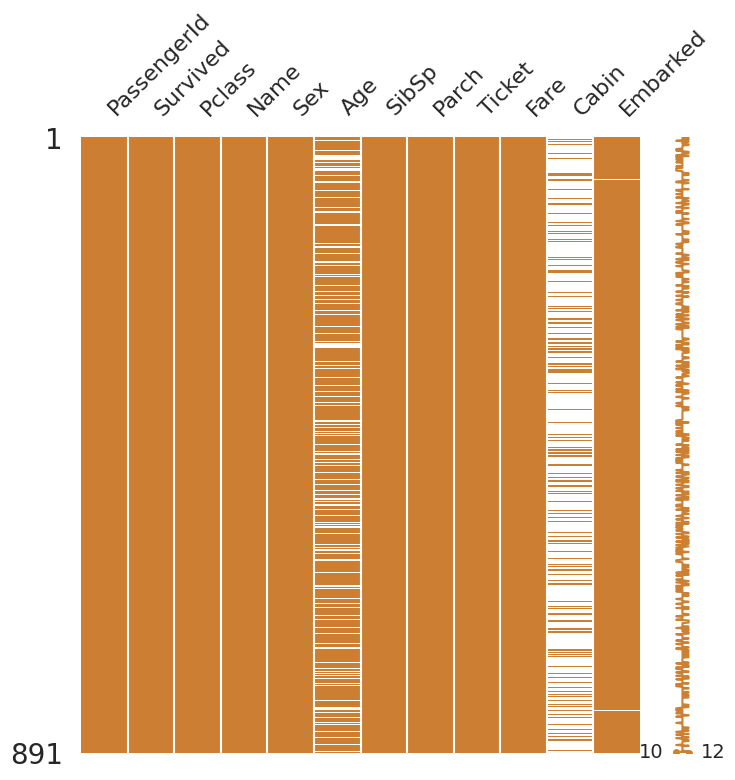

In [8]:
# missingno 패키지 사용하기 (matrix 사용)
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))
#color 파라미터 : RGB를 지정해주는 것.

흰색으로 표현된 빈칸들이 결측치이다.

-> Cabin 뱐수가 결측치가 가장 많음을 보여줌.

<Axes: >

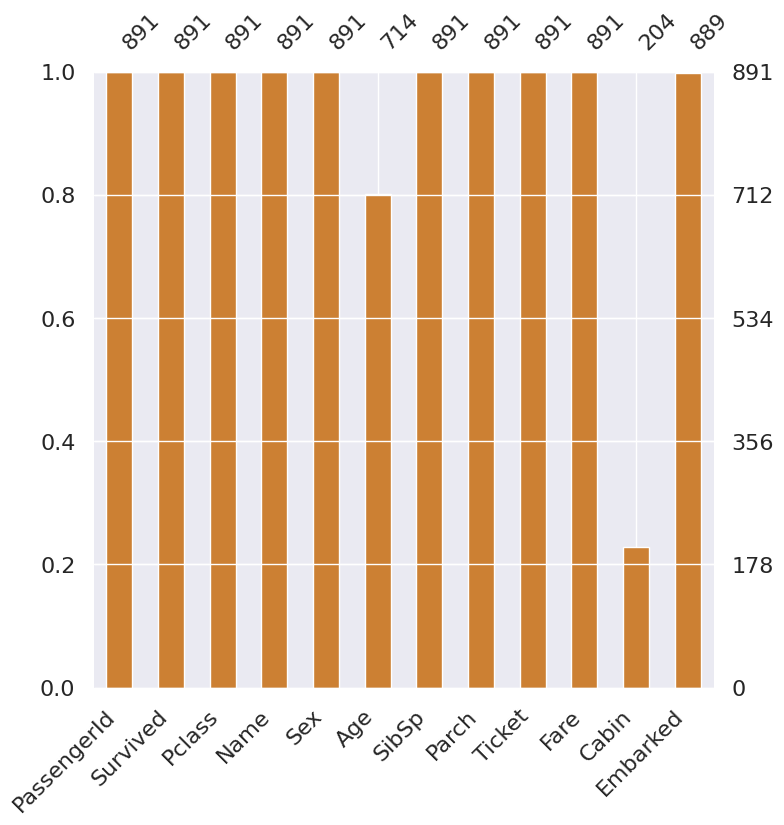

In [9]:
# Bar Chart
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2)) 
# 위와 동일하게 color 파라미터는 RGB를 지정해주는 것.

<Axes: >

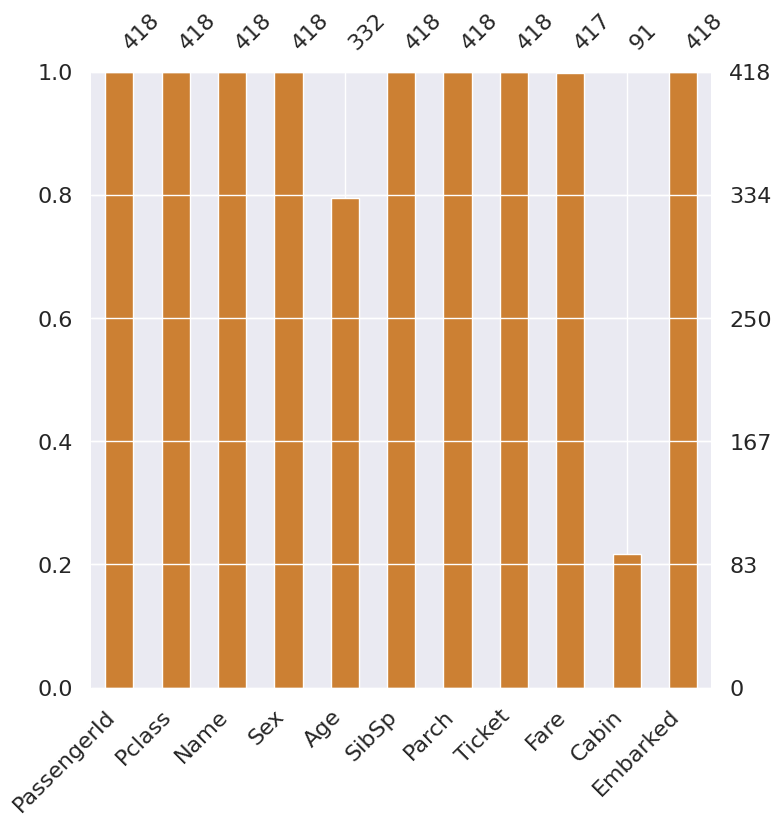

In [10]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

In [11]:
#Pclass 에 따른 생존률의 차이
# groupby 를 사용
# 'Pclass', 'Survived' 를 가져온 후, pclass 로 묶습니다. 그러고 나면 각 pclass 마다 0, 1 이 count가 되는데, 
#이를 평균내면 각 pclass 별 생존률이 나옵니다

df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [12]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [13]:
# pandas 의 crosstab사용 과정 시가과
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

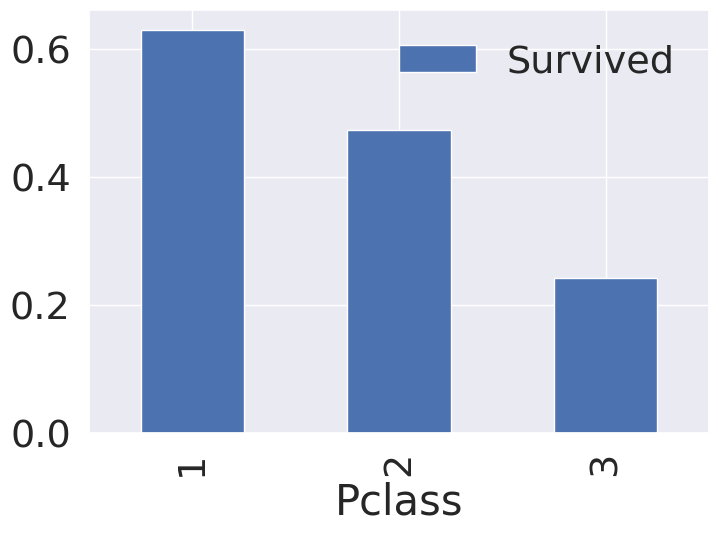

In [14]:
# grouped 객체에 mean() = 각 클래스별 생존률
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

class가 높을 수록 생존 확률이 놓음.

생존에 Pclass가 큰 영향을 미친 다고 생각할 수 있음.

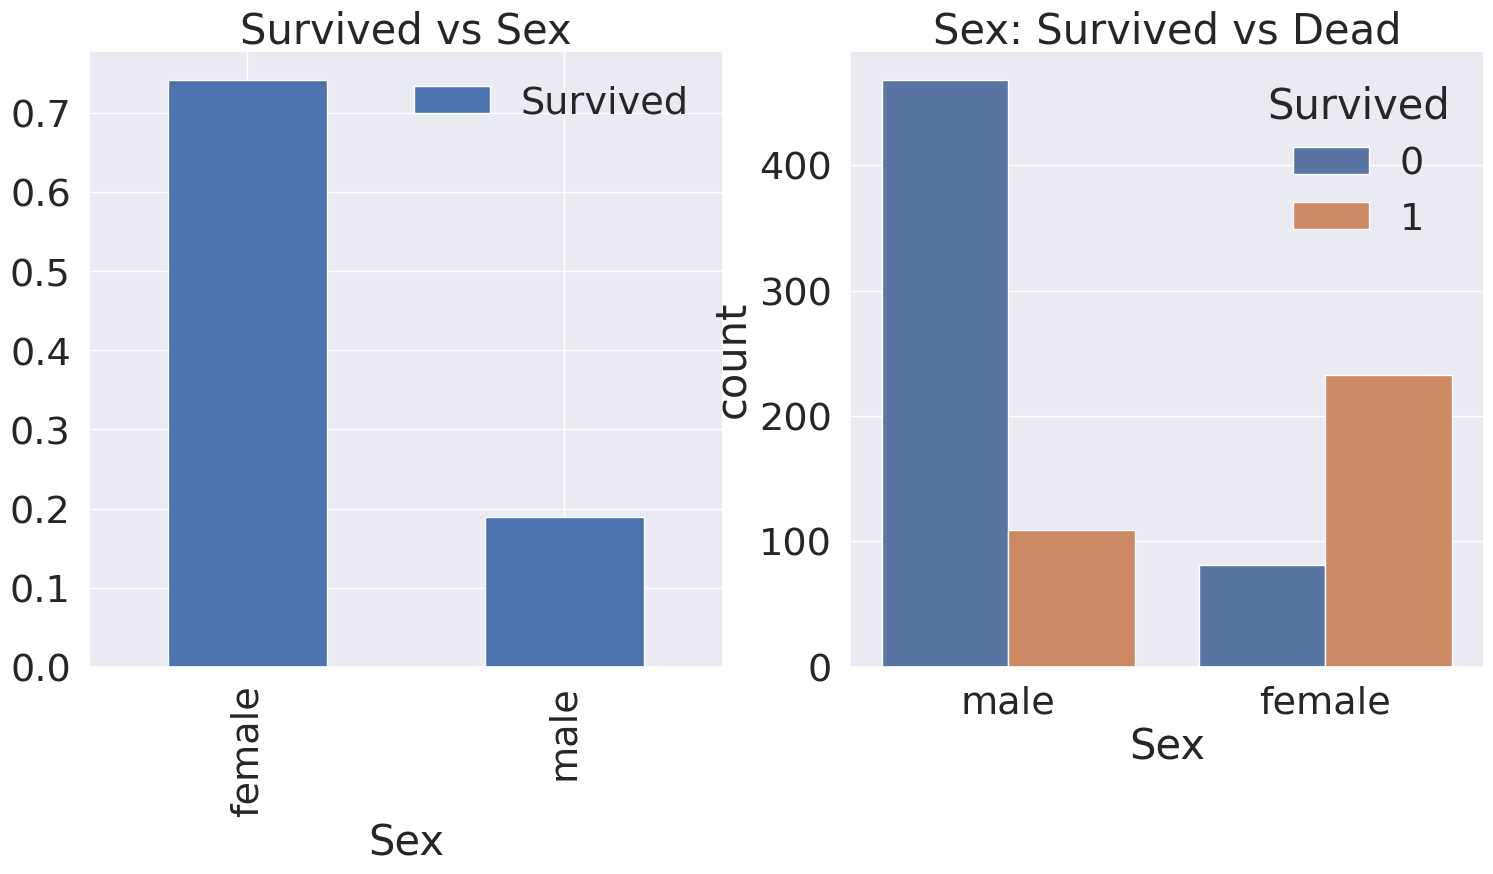

In [15]:
#성별에 따른 생존률 호ㅏㄱ인하기

f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(df_train, x='Sex', hue='Survived', ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

# 계속되는 Countpolt 관련 ㅇㅗ류
=> 유사한 오류의 해결법(콤멘트)

The first parameter to .lmplot() is data. So you're implicitly passing str('x'+str(i)) for that parameter, and also explicitly passing data=df later on in the parameter list. I'm not sure what parameter str('x'+str(i)) was supposed to be, but you probably just need to give an explicit keyword to specify it. (Same for the 'label' parameter.) – 
jasonharper
 Nov 7, 2022 at 6:15


 * 내 코드 관련 코멘트
 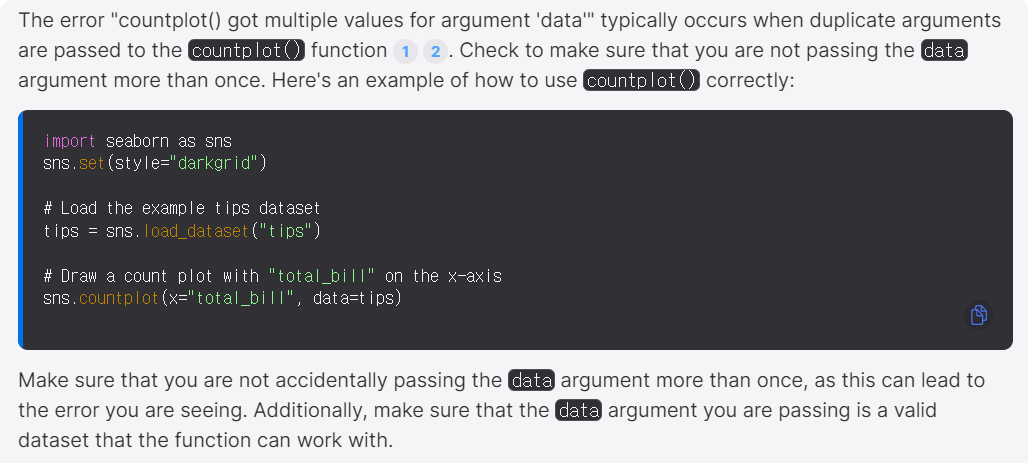
 => 그런데 저 값중 어떤것만 남겨야 하는 건지 모르겠음..

## 지율이의 도움으로 Countpolt 오류 해결. data의 우치와 x축 지정을 하명 되는 문제였다.

In [16]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


아래에 해당하는 원본 코드는 다른 것이지만 오류가 나서 찾아보니 
factorplot 은 최근 seaborn 버전에서는 catplot으로 사용 해야 한다고 한다. 

https://blog.naver.com/PostView.naver?blogId=fbfbf1&logNo=222458265191&parentCategoryNo=37&categoryNo=54&viewDate=&isShowPopularPosts=false&from=postView를 참고하여

https://stackoverflow.com/questions/54959764/seaborn-factorplot-generates-extra-empty-plots-below-actual-plot 를 참고 하였다.

하지만 아까와 같은 오류가 또 발생하였다.

도대체 multiple values for argument 'data' 해결 하는 방법이 머일까?

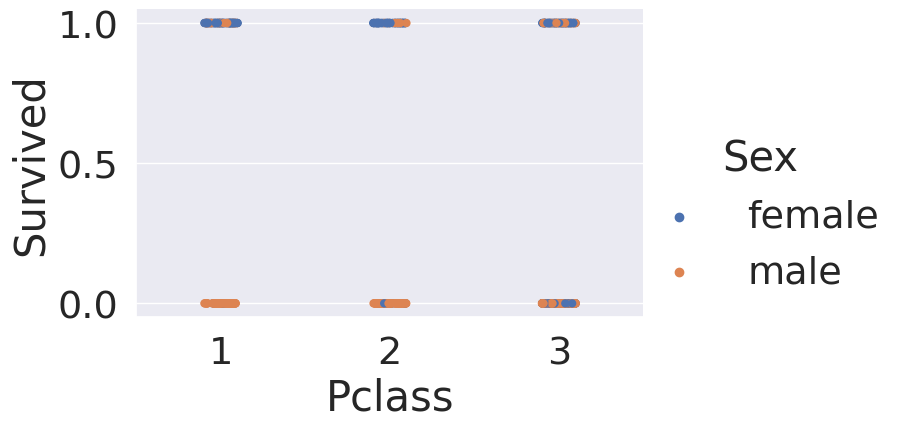

In [18]:
# 성별과 Pclass 둘다 함께 고려했을때 생존률
sns.catplot(data=df_train, x='Pclass',y= 'Survived', hue='Sex',  
               size=6, aspect=1.5)

In [21]:
#AGE 에 따른 생존률
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


In [22]:
# 결측값 해결하지
#Cabin 에서 결측값이 엄청 많았다 따라서 이를 모델에 포함하지 않도록 할것이다.
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 결측값 채우기

title + statistics사용

In [23]:
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.') # 인사말 뽑아내기
    
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.')# 인사말 뽑아내기

In [24]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r') #추출한 Initial 과 Sex 간의 count

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [25]:
#위 table 을 참고하여, 남자, 여자가 쓰는 initial 을 구분하기..
#replace : 문자열을 변경하는 함수

df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [26]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Initial,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,43.937188
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,24.939822
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,45.420603
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,19.102778


<Axes: xlabel='Initial'>

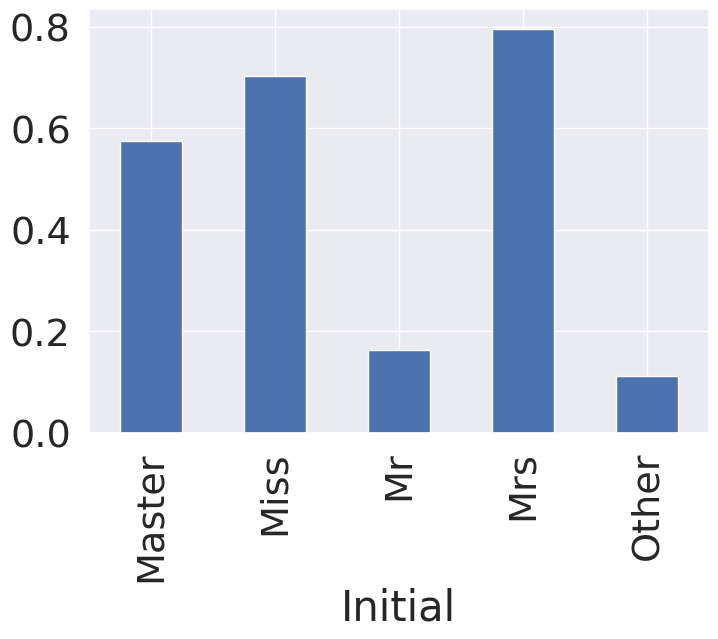

In [27]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

MISS, Mrs가 생존률이 높음

In [28]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Initial,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,43.937188
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,24.939822
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,45.420603
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,19.102778


In [29]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33       #Initial 이 Mr 인 조건을 만족하는 row(탑승객) 의 'Age' 의 값을 33으로 치환한다
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36      #Initial 이 Mrs 인 조건을 만족하는 row(탑승객) 의 'Age' 의 값을 36으로 치환한다
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5    #Initial 이 Master 인 조건을 만족하는 row(탑승객) 의 'Age' 의 값을 5로 치환한다
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22      # ""
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46      # ""

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [30]:
print(sum(df_train['Embarked'].isnull()), ' Null values')

2  Null values


Embarked : 2 개의 널 값 가짐

In [31]:
df_train['Embarked'].fillna('S', inplace=True)  #dataframe 의 fillna method

In [32]:
# 카테고리화.. -> ?

df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [33]:
df_train.drop(['Age', 'Age_cat'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

In [34]:
#사전 순서대로 정리, mapping
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [35]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [37]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [39]:
#null을 모두 S로 바꿔 주었음.
#따라서
df_train['Embarked'].isnull().any() #값은 false이어야함.

True

In [40]:
# SEX mapping하기
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

In [41]:
# 역서 말하는 prefix이 https://velog.io/@matisse/Python-2.-prefix-%EA%B5%AC%ED%95%98%EB%8A%94-%EB%B0%A9%EB%B2%95 여기서 말하는 것과 같은가??

df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')  #Initial 을 prefix로 두어서 구분이 쉽게 만들기 -> 사실 이해 x
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [42]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,NaN,NaN,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C85,NaN,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,NaN,NaN,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,C123,NaN,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,NaN,NaN,0,0,1,0,0


In [43]:
#원 학 인코딩
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [44]:
# 컬럼 필요 없는거 모두 드랍하기

df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [45]:
df_test.head()

,Pclass,Sex,Fare,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,3,1,7.8292,3,0,0,1,0,0
1,3,0,7.0000,4,0,0,0,1,0
2,2,1,9.6875,6,0,0,1,0,0
3,3,1,8.6625,2,0,0,1,0,0
4,3,0,12.2875,2,0,0,0,1,0


In [46]:
df_train.head()

,Survived,Pclass,Sex,Fare,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,0,3,1,7.2500,0,0,1,0,0
1,1,1,0,71.2833,0,0,0,1,0
2,1,3,0,7.9250,0,1,0,0,0
3,1,1,0,53.1000,0,0,0,1,0
4,0,3,1,8.0500,0,0,1,0,0


## sklearn을 사용해 머신러닝 모델 만들기1

In [47]:
from sklearn.ensemble import RandomForestClassifier #  randomforestclassfier 
from sklearn import metrics # 모델의 평가
from sklearn.model_selection import train_test_split 

In [48]:
# target label : Survived 
# 타겟 가렙 분리하여 학습데이터에 넣기
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [49]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)